<a href="https://colab.research.google.com/github/gabetrix/public-datasets/blob/main/trilha04_Atividade_de_aprofundamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# dependências para a atividade
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [6]:
# mostrar inicio e fim do arquivo
df=pd.read_csv('https://raw.githubusercontent.com/gabetrix/public-datasets/main/apple_quality.csv')
display(df.head())

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [7]:
display(df.tail())

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [8]:
# remover última linha desnecessária
df.drop(4000, axis=0, inplace=True)
display(df.tail())

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [9]:
# mostrando o tipo dos dados
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


None

In [10]:
# TODO: ALTERAR TIPO DO ACIDITY E QUALITY E REMOVER COLUNA DE ID
df['Acidity'] = df['Acidity'].astype('float64')
df.Quality = (df.Quality == 'good').astype(int)
df = df.drop('A_id', axis=1)

# verificar dataframe
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [11]:
# TODO: separar a variável alvo coluna 'Quality'

# separando features da variável alvo
y = df.Quality
X = df.drop('Quality', axis=1)

In [29]:
# separar conjuntos de teste e treinamento // LEMBRAR DE USAR 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   stratify=y, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5,
                                                   stratify=y_test, random_state=42)

# verificar shape do conjunto de treino
X_train.shape[1]

7

In [30]:
# criando o modelo
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=[7]),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 64        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# compilar o modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

# configurar early-stop
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [32]:
# treinando o modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=100,
    callbacks=[early_stopping],
    verbose=0,
)

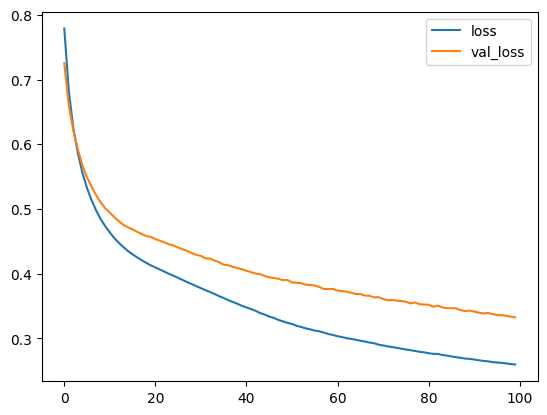

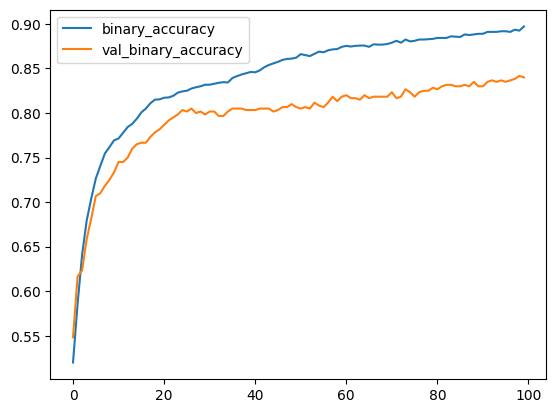

In [33]:
def display_apple_hist(history):
  history_df = pd.DataFrame(history.history)
  history_df.loc[:, ['loss', 'val_loss']].plot()
  history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();
display_apple_hist(history)

In [34]:
def print_results(y_test, y_pred):
  print('Matriz de confusão: \n', confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print('Acuracidade: ', accuracy_score(y_test, y_pred))
  return

In [35]:
y_pred = model.predict(X_test) > 0.5
print_results(y_test, y_pred)

19/19 [==============================] - 0s 1ms/step
Matriz de confusão: 
 [[268  32]
 [ 36 264]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       300
           1       0.89      0.88      0.89       300

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

Acuracidade:  0.8866666666666667


In [2]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.9 MB/s eta 0:00:00


In [3]:
from kerastuner.tuners import RandomSearch

<ipython-input-3-94471a811b41>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [40]:
def builded_model(hp):
  # criando o modelo
  model = keras.Sequential([
      layers.Dense(8, activation='relu', input_shape=[7]),
      layers.Dense(20, activation='relu'),
      layers.Dense(1, activation='sigmoid'),
  ])
  model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
  )
  return model


In [41]:
tuner = RandomSearch(
    builded_model,
    objective='val_accuracy',
    max_trials=5,
    directory='dir',
    project_name='trilha06'
)

Reloading Tuner from dir/trilha06/tuner0.json


In [42]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 0.6294 - binary_accuracy: 0.6414 - val_loss: 0.5698 - val_binary_accuracy: 0.6733
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.5368 - binary_accuracy: 0.7096 - val_loss: 0.5152 - val_binary_accuracy: 0.7067
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4842 - binary_accuracy: 0.7611 - val_loss: 0.4674 - val_binary_accuracy: 0.7750
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4436 - binary_accuracy: 0.7943 - val_loss: 0.4297 - val_binary_accuracy: 0.7967
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.4130 - binary_accuracy: 0.8111 - val_loss: 0.4013 - val_binary_accuracy: 0.8150
